In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, Normalizer

In [2]:
# Define Paths

train_num='1'
test_num='7'
num_nanowires='100'
Time = '30'
test_type='LDA' #LDA
kernel_type='linear' #linear, rbf - kernel options for SVM
date_of_training='14'
date_of_testing='14'

multi_class=1 #CHANGE HERE FOR MULTI-CLASS LDA/SVM (1 = yes, 0 = no)
if multi_class:
    m='_multi-class_YES'
else:
    m='_multi-class_NO'

path="C:/Users/aloe8475/Documents/PhD/GitHub/CODE/Adrian's Code/NETWORK_sims_2/Saved Networks/Simulations Only/Python Data/"
if test_type == 'LDA':
    save_path='C:/Users/aloe8475/Documents/PhD/GitHub/CODE/Data/Figures/' + test_type + '/Python LDA/'
else:
    save_path='C:/Users/aloe8475/Documents/PhD/GitHub/CODE/Data/Figures/' + test_type + '/'

#Train with a testing file:
# filename_train = path + 'Net_Sx_20_NoW100_03_25-2019_11_23_38_Zdenka_Square_1SimsOnly_10_Sec_4Electrodes_Vmax_0.5_Testing Simulation_' + train_num + '_' + date_of_training + '-Jun-2019_ForPython.mat'

#Train with normal file:
filename_train = path + 'Net_Sx_20_NoW100_03_25-2019_11_23_38_Zdenka_Square_1SimsOnly_10_Sec_4Electrodes_Vmax_0.5_Training Simulation_' + train_num + '_' + date_of_training + '-Jun-2019_ForPython.mat'
filename_train_save= test_type+'_Training Simulation_'+ train_num + '_' + Time + '_Sec_' + num_nanowires +'nw_' + date_of_training + '-Jun-2019' 

#Test with training file:
# filename_test = path + 'Net_Sx_20_NoW100_03_25-2019_11_23_38_Zdenka_Square_1SimsOnly_10_Sec_4Electrodes_Vmax_0.5_Training Simulation_' + test_num + '_' + date_of_testing + '-Jun-2019_ForPython.mat'

#Test with normal file
filename_test = path+ 'Net_Sx_20_NoW100_03_25-2019_11_23_38_Zdenka_Square_1SimsOnly_10_Sec_4Electrodes_Vmax_0.5_Testing Simulation_' + test_num +'_14-Jun-2019_ForPython.mat'

if test_type == 'SVM':
    filename_test_save= test_type+'_'+kernel_type+'_kernel'+'_Testing Simulation_' + test_num +'_' + Time + '_Sec_' + num_nanowires + 'nw_' + date_of_testing + '-Jun-2019' 
else:
    filename_test_save= test_type+'_Testing Simulation_' + test_num +'_' + Time + '_Sec_' + num_nanowires + 'nw_' + date_of_testing + '-Jun-2019' 

# filename = 'Alon_Code/Data/Testing/Extracted_test_2.mat'

In [3]:
# Load the Training data

data = loadmat(filename_train)

IDrain = data['IDrain']#.todense()
VSource = data['VSource']
IDrain1_Train=IDrain[:,0].todense()
IDrain2_Train=IDrain[:,1].todense()
VSource1_Train=VSource[:,0]
VSource2_Train=VSource[:,1]

In [15]:
VSource1_Train.shape

(1000,)

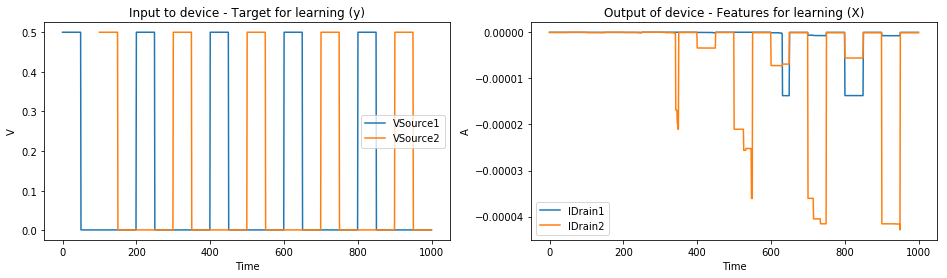

In [4]:
# Explore
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

axes[0].plot(VSource1_Train, label = 'VSource1'); axes[0].plot(VSource2_Train, label = 'VSource2')
axes[0].set_title("Input to device - Target for learning (y)"); axes[0].set_xlabel('Time'); axes[0].set_ylabel('V')
axes[0].legend()
axes[1].plot(IDrain1_Train, label = 'IDrain1'); axes[1].plot(IDrain2_Train, label = 'IDrain2')
axes[1].set_title("Output of device - Features for learning (X)"); axes[1].set_xlabel('Time'); axes[1].set_ylabel('A')
axes[1].legend()

# fig.savefig(save_path + filename_train_save + m + '_Training_Parameters_'+datetime.datetime.now().strftime("%Y-%m-%d") +'.jpg')
# fig.savefig(save_path + filename_train_save + m +'_Training_Parameters_'+datetime.datetime.now().strftime("%Y-%m-%d") +'.eps')

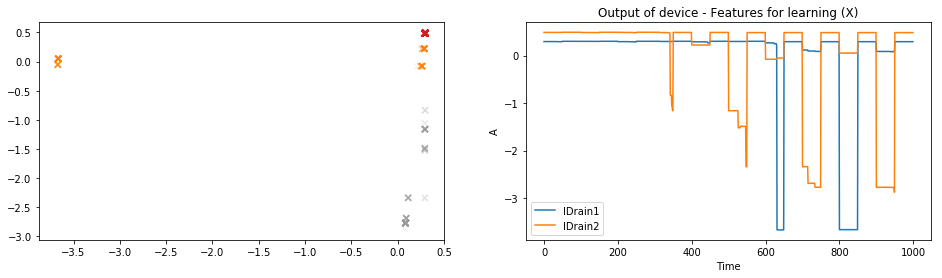

In [5]:
# Split the data
start_time = 0
X = np.hstack([IDrain1_Train, IDrain2_Train])[start_time:]
y = VSource1_Train[start_time:].ravel()
y = (y == np.nanmax(y))
y2 = VSource2_Train[start_time:].ravel()
y2 = (y2 == np.nanmax(y2)) * 2
if multi_class:
    y = y + y2

# X[:,1] = X[:,1] / X[:,0]
scalar = StandardScaler()
# scalar = Normalizer(norm = 'l2')
X = scalar.fit_transform(X)
# X = (X - X.mean(axis = 0)) / X.std(axis = 0)
# X = (X - X.mean(axis = 0)) / X.std(axis = 0)
# X = (X - X.mean(axis = 1)) / X.std(axis = 1)
X = np.asarray(X) * 1

# sns.kdeplot(X[:,0][y], X[:,1][y])
# sns.kdeplot(X[:,0][~y], X[:,1][~y])
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

axes[0].scatter(X[:,0], X[:,1], c = y, marker = 'x', cmap = 'Set1', alpha = 0.1);

axes[1].plot(X[:,0], label = 'IDrain1'); axes[1].plot(X[:,1], label = 'IDrain2')
axes[1].set_title("Output of device - Features for learning (X)"); axes[1].set_xlabel('Time'); axes[1].set_ylabel('A')
axes[1].legend()

In [6]:
# Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0, random_state = 0)


In [9]:
print(X_train.shape)
print(y_train.shape)

(1000, 2)
(1000,)


In [144]:

if test_type=='SVM':
 clf = SVC(kernel = kernel_type, C = 1, probability = True).fit(X_train, y_train) #change kernel here
elif test_type=='LDA':
 clf = LinearDiscriminantAnalysis().fit(X_train, y_train)
# clf = RandomForestClassifier().fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# print('Test accuracy:', clf.score(X_test, y_test))

In [145]:
# y_pred

In [146]:
# clf.predict_proba(X_test)

In [147]:
# Plot
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

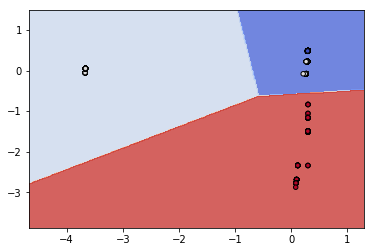

In [148]:
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots()
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

fig.savefig(save_path + filename_train_save + m + '_Training_Classification_' +datetime.datetime.now().strftime("%Y-%m-%d") +'.jpg')
fig.savefig(save_path + filename_train_save + m + '_Training_Classification_' +datetime.datetime.now().strftime("%Y-%m-%d") +'.eps')


In [149]:
# Load the test data
data_test = loadmat(filename_test)

In [150]:
IDrain = data_test['IDrain']#.todense()
VSource = data_test['VSource']
IDrain1_Test=IDrain[:,0].todense()
IDrain2_Test=IDrain[:,1].todense()
VSource1_Test=VSource[:,0]
VSource2_Test=VSource[:,1]

In [151]:
new_start_time = 0
X_test = np.hstack([IDrain1_Test, IDrain2_Test])[new_start_time:]

# X[:,1] = X[:,1] / X[:,0]
X_test = scalar.transform(X_test)
# scalar = Normalizer(norm = 'l1')
# X_test = scalar.transform(X_test)
# X_test = (X_test - X_test[start_time:].mean(axis = 0)) / X_test[start_time:].std(axis = 0)
# X_test = (X_test - X_test.mean(axis = 1)) / X_test.std(axis = 1)

# X_test = (X_test - X_test.mean(axis = 0)) / X_test.std(axis = 0)
# X = (X - X.mean(axis = 1)) / X.std(axis = 1)
X_test = np.asarray(X_test) * 1

y = VSource1_Test[new_start_time:].ravel()
y = (y == y.max())
y2 = VSource2_Test[new_start_time:].ravel()
y2 = (y2 == np.nanmax(y2)) * 2
if multi_class:
    y_test = y + y2

y_pred = clf.predict(X_test)

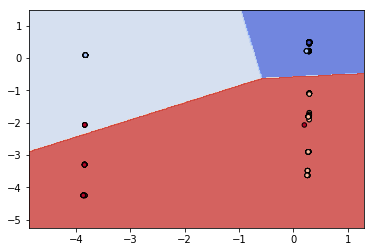

In [152]:
X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

fig, ax = plt.subplots()
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

fig.savefig(save_path + filename_train_save + '_' + filename_test_save + m +  '_Testing_Classification_' +datetime.datetime.now().strftime("%Y-%m-%d") +'.jpg')
fig.savefig(save_path + filename_train_save + '_' + filename_test_save + m + '_Testing_Classification_' +datetime.datetime.now().strftime("%Y-%m-%d") +'.eps')

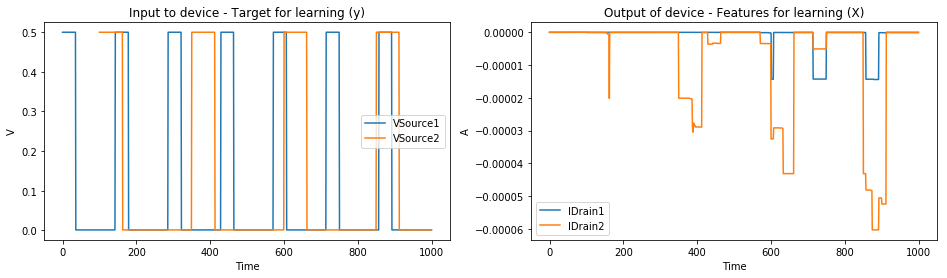

In [153]:
# Explore
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

axes[0].plot(VSource1_Test, label = 'VSource1'); axes[0].plot(VSource2_Test, label = 'VSource2')
axes[0].set_title("Input to device - Target for learning (y)"); axes[0].set_xlabel('Time'); axes[0].set_ylabel('V')
axes[0].legend()
axes[1].plot(IDrain1_Test, label = 'IDrain1'); axes[1].plot(IDrain2_Test, label = 'IDrain2')
axes[1].set_title("Output of device - Features for learning (X)"); axes[1].set_xlabel('Time'); axes[1].set_ylabel('A')
axes[1].legend()

fig.savefig(save_path + filename_train_save + '_' + filename_test_save + m + '_Testing_Parameters_' +datetime.datetime.now().strftime("%Y-%m-%d") +'.jpg')
fig.savefig(save_path + filename_train_save + '_' + filename_test_save + m + '_Testing_Parameters_' +datetime.datetime.now().strftime("%Y-%m-%d") +'.eps')

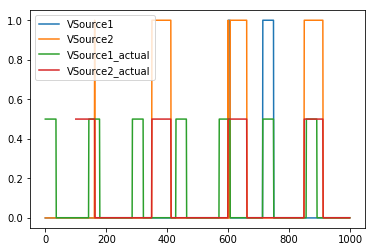

In [154]:
plt.plot(y_pred == 1, label = 'VSource1')
plt.plot(y_pred == 2, label = 'VSource2')
plt.plot(VSource1_Test, label = 'VSource1_actual')
plt.plot(VSource2_Test, label = 'VSource2_actual')
plt.legend()
plt.savefig(save_path + filename_train_save + '_' + filename_test_save + '_' + test_type + m +  '_Prediction_' +datetime.datetime.now().strftime("%Y-%m-%d") +'.jpg')
plt.savefig(save_path + filename_train_save + '_' + filename_test_save + '_' + test_type + m + '_Prediction_' +datetime.datetime.now().strftime("%Y-%m-%d") +'.eps')